### 회귀분석 결과에 대한 평가 지표는 예측값과 실제값의 차이인 오류의 크기가 됨
### 정확한 평가를 위해서는 오류의 절대값 평균이나 제곱의 평균, 제곱평균의 제곱근 또는 분산비율

### MAE : Mean Absolute Error  /  metrics.mean_absolute_error()
### MSE : Mean Squared Error  /   metrics.mean_squared_error()
### RMSE : Root Mean Squared Error / 없음    sqrt(mse)
### R2 Variance Score(결정계수)   / metrics.r2_score()

In [3]:
# 보스턴 주택 가격
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
boston_df= pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
boston_df['PRICE'] =  boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
print('보스턴 주택 가격 데이터셋 크기:',boston_df.shape)

보스턴 주택 가격 데이터셋 크기: (506, 14)


In [13]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [14]:
#14개의 독립 변수(피처)의 의미
#CRIM: 지역별 범죄 발생률
# ZN: 25,000평방피트를 초과하는 거주 지역 비율
# INDUS: 비상업 지역의 넓이 비율
# CHAS: 찰스강의 더미변수(1은 강의 경계, 0은 경계 아님)
# NOX: 일산화질소 농도
# RM: 거주할 수 있는 방 개수
#  AGE: 1940년 이전에 건축된 주택 비율
#  DIS: 5개 주요 고용센터까지 가중 거리
#  RAD: 고속도로 접근 용이도
# TAX: 10,000달러당 재산세 비율  
# PTRATIO: 지역의 교사와 학생 수 비율  
# B: 지역의 흑인 거주 비율  
# LSTAT: 하위 계층의 비율  
# PRICE(MEDV): 본인 소유 주택 가격의 중앙값

In [15]:
# 선형 회귀를 이용해서 모델 구축

In [16]:
from sklearn.linear_model import LinearRegression       # 머신러닝
from sklearn.model_selection import train_test_split    # 데이터 분류
from sklearn.metrics import mean_squared_error, r2_score  # 평가 측정 도구

In [20]:
y = boston_df['PRICE']
x = boston_df.iloc[:,:-1]
x.shape, y.shape

((506, 13), (506,))

In [21]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,random_state=156, test_size=0.3)
# x_train / y_train           x_test / y_test

In [24]:
# 모델 구축
lr =  LinearRegression()

In [25]:
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
# 예측
y_predict = lr.predict(x_test)

In [35]:
# 모델 평가(측정)
mse =  mean_squared_error(y_test, y_predict)
rmse =  np.sqrt(mse)
r2score = r2_score(y_test,y_predict)
print('MSE : {0:.3f},  RMSE:{1:.3f}'.format(mse,rmse))
# print(f"MSE : {round(mse,3)},  RMSE:{round(rmse,3)}")
print(f"R^2(Variance score):{round(r2score,3)}")

MSE : 22.099,  RMSE:4.701
R^2(Variance score):0.684


In [30]:
mse, rmse

(22.098694827098036, 4.700924890603766)

In [41]:
print('Y절편의 값 : ', lr.intercept_)
print("회귀 계수의 값 :",np.round(lr.coef_,1))

Y절편의 값 :  29.836420163839108
회귀 계수의 값 : [ -0.1   0.    0.    2.8 -16.2   4.4  -0.   -1.4   0.3  -0.   -0.9   0.
  -0.5]


### 선형 회귀 분석 모델을 평가 지표를 통해 평가하고 회귀 계수를 확인하여 피처의 영향을 분석

In [45]:
coef= pd.Series(np.round(lr.coef_,1),index=x.columns)
coef.sort_values(ascending=False)

RM          4.4
CHAS        2.8
RAD         0.3
ZN          0.0
INDUS       0.0
AGE        -0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.9
DIS        -1.4
NOX       -16.2
dtype: float64

### 회귀 분석 결과를 산점도 + 선형 회귀 그래프로  시각화

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

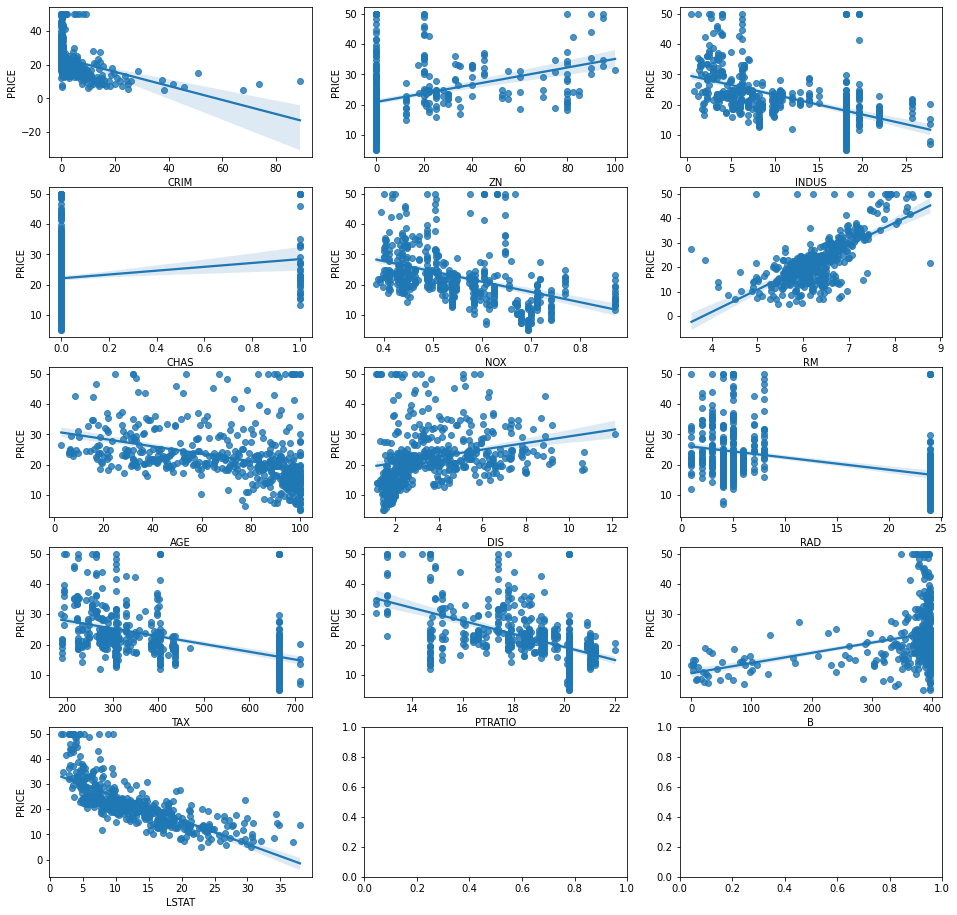

In [53]:
fig, axs =  plt.subplots(figsize = (16,16), ncols = 3, nrows = 5)
x_features = x.columns
for i,feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='PRICE', data=boston_df, ax = axs[row][col])

# 자동차연비

In [55]:
data_df = pd.read_csv("https://raw.githubusercontent.com/bigdataleeky/python/main/20220307/auto-mpg.csv")
data_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [56]:
print(f"데이터셋 크기 : {data_df.shape}")

데이터셋 크기 : (398, 9)


In [57]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [60]:
data_df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [61]:
# 연비에 영향을 주지 않는 컬럼제거
# car_name horsepower origin
data_df2 =  data_df.drop(['car_name','origin','horsepower'], axis=1,inplace=False)
data_df2.head()

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [62]:
data_df2.shape

(398, 6)

In [63]:
data_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [72]:
y = data_df2.iloc[:,0]
x = data_df2.iloc[:,1:]
y.shape, x.shape

((398,), (398, 5))

In [73]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.3,random_state=0)

In [74]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [75]:
y_predict = lr.predict(x_test)

In [76]:
mse = mean_squared_error(y_test,y_predict)
rmse = np.sqrt(mse)
r2score = r2_score(y_test,y_predict)
print(f"mse = {mse}  rmse = {rmse}  r2score = {r2score}")

mse = 12.278239036609444  rmse = 3.5040318258556735  r2score = 0.8078579451877173


In [77]:
print(f"절편(bias) : {lr.intercept_}")
print(f"가중치(기울기)(회기계수) : {lr.coef_}")

절편(bias) : -17.54805722395158
가중치(기울기)(회기계수) : [-0.13707609  0.00748253 -0.00688522  0.19807649  0.7577852 ]


In [79]:
coef = pd.Series(data=np.round(lr.coef_,2), index=x.columns)
coef.sort_values(ascending=False)

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

In [80]:
data_df2.head()

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
x.columns

Index(['cylinders', 'displacement', 'weight', 'acceleration', 'model_year'], dtype='object')

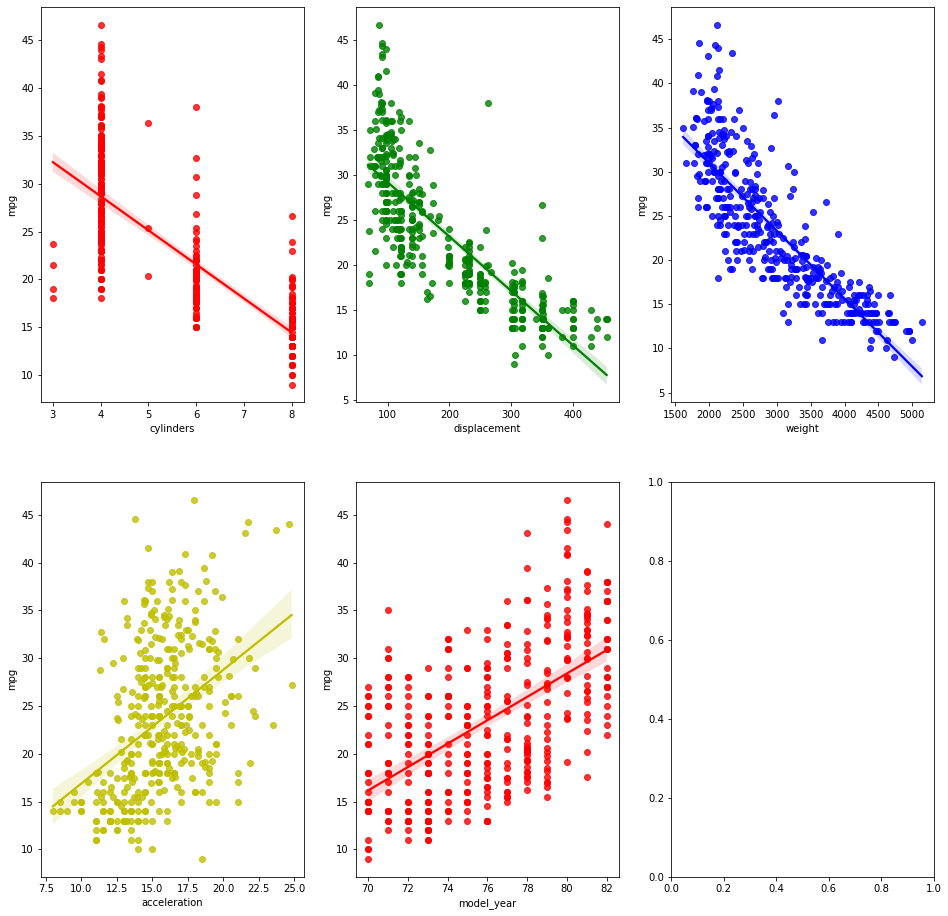

In [91]:
fig, axs = plt.subplots(figsize=(16,16), ncols=3, nrows=2)
color = ['r','g','b','y','r']
for i, feature in enumerate(x.columns):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y='mpg', data=data_df2, ax = axs[row][col],color = color[i] )

In [92]:
# 스케일링이 필요할까?
data_df2.head()

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [93]:
print("연비를 예측해 보세요.")

연비를 예측해 보세요.


In [95]:
# cylinders = 8
# displacement = 350
# weight = 3200
# acceleration = 22
# model_year = 99
user_predic = [[8,350,3200,22,99]]
y_user_predict =  lr.predict(user_predic)
y_user_predict

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41.31991868])